In [1]:
from textblob import TextBlob
import sys, tweepy
import matplotlib.pyplot as plt


In [2]:
def percentage(part, whole):
    return 100*float(part)/float(whole)


In [3]:
#credentials masked --
#register and get yours form apps.twitter.com -
#-will take 5 min to fill the forms and wait for confirmation email from twitter with the below
consumerKey="pxDE"
consumerSecret="zi7u"
accessToken="4U4D"
accessTokenSecret="PmyEvK"

In [4]:
auth=tweepy.OAuthHandler(consumer_key=consumerKey, consumer_secret=consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth)

Enter Keyword/hastag to search about:ICC
Enter how many tweets to analyse: 20
Pakistan captain Sarfaraz Ahmed allegedly accused ICC of helping India in World Cup https://t.co/xTTXs2y9aH

"Nach… https://t.co/GD5bkAehqS
The #Gbagbo acquittal and the battle for the #ICC’s legitimacy https://t.co/D3ZHYw0KzP
Fans mock ICC with funny tweets as the weather continues to play spoilsport in World Cup
Read More -… https://t.co/yNPPj6VTLR
Chennai gears up to break a Guinness World Record
Read More - https://t.co/2wbwhgYe9w
@phoenixmall @WestinChennai… https://t.co/DZVeihfbNV
World Cup: India Probable Playing XI, New Zealand Probable Playing XI
Read More - https://t.co/EjMXPMEy3R
@ICC… https://t.co/2Qwr7nnRvo
Rishabh Pant or Shreyas Iyer likely to replace injured Shikhar Dhawan
Read More - https://t.co/BQRskKMuyv… https://t.co/gyiYSjI318
Injured Shikhar Dhawan ruled out of World Cup 2019 for 3 weeks
Read More - https://t.co/eS2tV9tKg0
@SDhawan25… https://t.co/pJKhxV5AEi
9.21590909090909
Positive


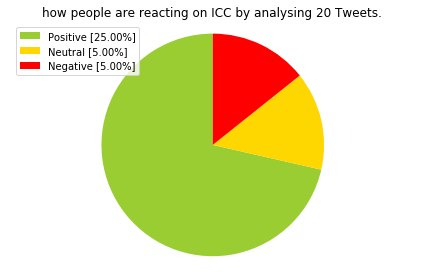

In [9]:
searchTerm=str(input("Enter Keyword/hastag to search about:"))
noOfSearchTerms=int(input("Enter how many tweets to analyse: "))
tweets=tweepy.Cursor(api.search, q=searchTerm, lang="English").items(noOfSearchTerms)
positive=0
negative=0
neutral=0
polarity=0
for tweet in tweets:
    print(tweet.text)
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    if(analysis.sentiment.polarity ==0):
        neutral+=1
    elif(analysis.sentiment.polarity <0.00):
        negative+=1
    elif(analysis.sentiment.polarity >0.00):
        positive+=1
positive = percentage(positive, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
polarity=percentage(polarity,noOfSearchTerms)
print(polarity)

positive=format(positive,'.2f')
neutral=format(neutral,'.2f')
negative=format(negative,'.2f')

if(polarity==0):
    print("Neutral")
elif(polarity <0.00):
    print("Negative")
elif(polarity >0.00):
    print("Positive")
    
labels = ['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]',  'Negative ['+str(negative)+'%]']
sizes =[positive, neutral, negative]
colors=['yellowgreen','gold','red']
patches, texts=plt.pie(sizes,colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("how people are reacting on " + searchTerm + " by analysing " + str(noOfSearchTerms)+ " Tweets.")
plt.axis('equal')      
plt.tight_layout()  
plt.show()         